In [1]:
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras import models
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import os
import glob as gb
import cv2
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import roc_curve, auc

In [2]:
image_path = 'D:/Faaclty/level 3/selcted-1/SVM image/PetImages'

In [3]:
categories = ['Cat','Dog']

In [4]:
data =[]
for category in categories :
    path = os.path.join(image_path,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img = cv2.imread(imgpath)
        try :
            pet_img = cv2.resize(pet_img,(120,120))
            image = np.array(pet_img).flatten()
            data.append([image,label])
        except Exception as e :
            pass

In [5]:
print(len(data))

24946


In [6]:
pick_in = open('D:/Faaclty/level 3/selcted-1/New folder (3)/data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [7]:
pick_in = open('D:/Faaclty/level 3/selcted-1/New folder (3)/data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [9]:
random.shuffle(data)
features = []
labels = []
for feature , label in data :
    features.append(feature)
    labels.append(label)

print (labels)    
#x_train,y_train,x_test,y_test = (features,labels ,test_size = 0.2)    

[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 

In [10]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.7)

In [17]:
# we use 9248 image only because dataset is very big
x_test = x_test[:1800]
y_test = y_test[:1800]

In [18]:
print(len(y_train))

7483


In [19]:
print(len(x_test))
print(len(y_test))

1800
1800


In [20]:
classifier = SVC(C=1,kernel = 'poly', gamma = 'auto'  )

In [11]:
history = classifier.fit(x_train, y_train)
pick = open('D:/Faaclty/level 3/selcted-1/New folder (3)/model6.sav','wb')
pickle.dump(classifier,pick)
pick.close()

In [25]:
pick = open('D:/Faaclty/level 3/selcted-1/New folder (3)/model3.sav','wb')
pickle.dump(classifier,pick)
pick.close()

In [14]:
pick = open('D:/Faaclty/level 3/selcted-1/New folder (3)/model1.sav','rb')
model = pickle.load(pick)
pick.close()

In [22]:
acurrecy = model.score(x_test,y_test)
print ('acurracy',acurrecy)

acurracy 0.7305555555555555


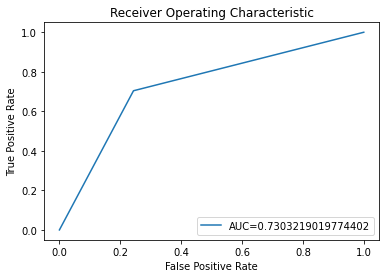

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
import sklearn.metrics as metrics
import pandas as pd
prediction = model.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction)
auc = metrics.roc_auc_score(y_test, prediction)
#create ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
accuracy_score(y_test, prediction)


[[687 221]
 [264 628]]


0.7305555555555555